In [1]:
import pymysql.cursors
import pandas as pd

# Connect to the database
connection = pymysql.connect(host='localhost',
                             user='root',
                             password='root',
                             database='PA',
                             cursorclass=pymysql.cursors.DictCursor)

with connection.cursor() as cursor:
    cursor.execute("SELECT DISTINCT Estacion FROM presionatmosferica")
    result_est = cursor.fetchall()
    cursor.execute("SELECT DISTINCT Parametro FROM presionatmosferica")
    result_par = cursor.fetchall()
    #cursor.close()
    cursor.execute("SELECT DISTINCT Parametro FROM presionatmosferica")
    result_par = cursor.fetchall()
    cursor.close()
estaciones = pd.DataFrame(result_est)
parametros = pd.DataFrame(result_par)
QuerySerial = [[i, estaciones.Estacion.iloc[i], parametros.Parametro.iloc[j]]for i in range(len(estaciones)) for j in range(len(parametros))]
QuerySerial

[[0, 'AJM', 'PA'],
 [1, 'CUT', 'PA'],
 [2, 'HGM', 'PA'],
 [3, 'INN', 'PA'],
 [4, 'LAA', 'PA'],
 [5, 'MER', 'PA'],
 [6, 'MON', 'PA'],
 [7, 'MPA', 'PA'],
 [8, 'TLA', 'PA'],
 [9, 'XAL', 'PA']]

In [3]:
ConsultaV = 'SELECT Valor FROM presionatmosferica WHERE Estacion=' + QuerySerial[1][1] + ' ORDER BY FechaDEC ASC'
ConsultaV

'SELECT Valor FROM presionatmosferica WHERE Estacion=CUT ORDER BY FechaDEC ASC'

In [2]:
import time
import pymysql.cursors
import mysql.connector
import pandas as pd
import numpy as np
import math
import random
from sympy import *
ConsultaV = 'SELECT FechaDEC, Valor FROM presionatmosferica WHERE Estacion="' + QuerySerial[0][1] + '" ORDER BY FechaDEC ASC'
print(ConsultaV)
with connection.cursor() as cursor:

    #ConsultaV = 'SELECT Valor FROM presionatmosferica WHERE Estacion=' + QuerySerial[0][1] + ' ORDER BY FechaDEC ASC'
    cursor.execute(ConsultaV)
    Valor = cursor.fetchall()
len(Valor)
Datos = pd.DataFrame(Valor)
Datos['Valor'] = pd.to_numeric(Datos['Valor'], errors='coerce')
Datos['FechaDEC'] = pd.to_numeric(Datos['FechaDEC'], errors='coerce')
llenos = Datos.dropna()
huecos = Datos[Datos.isnull().values]
nkrig = 24 * 7
#vals = [random.choice(llenos.values.tolist()) for i in range(dim)]
#len(vals) == dim
#dim = len(llenos)


SELECT FechaDEC, Valor FROM presionatmosferica WHERE Estacion="AJM" ORDER BY FechaDEC ASC


/home/ars/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

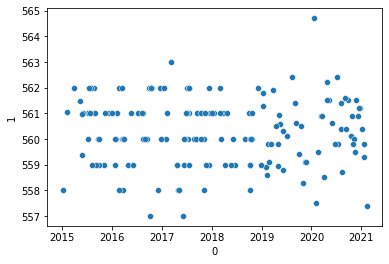

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
U = [llenos.iloc[random.randrange(1, len(llenos))].tolist() for n in range(nkrig)]
forplot = pd.DataFrame(U)
sns.scatterplot(forplot[0] ,forplot[1])

In [13]:
time_start = time.time()
ubic = [float(huecos.iloc[1].FechaDEC), 1]
U = [llenos.iloc[random.randrange(1, len(llenos))].tolist() for n in range(nkrig)]
dim = len(U)
U.append(ubic)
Distances = [[math.dist(U[i],U[j]) for i in range(len(U))] for j in range(len(U))]
S = ones(dim+1, dim+2)
D = Matrix(Distances)
S[0:dim, 0:dim] = D[0:dim, 0:dim]
S[dim, dim] = 0.0
S[0:dim, dim+1] = D[0:dim, dim]
Sol, _ = S.rref()
#Sol[0:dim, dim+1]
Vals = S[0:dim, dim+1]
result = (Sol[0:dim, dim+1].T * Vals)[0]
print(float(result))
d_t = time.time() - time_start
d_t

555.8920768404518


73.74644637107849

In [20]:
for i in range(200):
    time_start = time.time()
    ubic = [float(huecos.iloc[243].FechaDEC), 0]
    U = [llenos.iloc[random.randrange(1, len(llenos))].tolist() for n in range(nkrig)]
    dim = len(U)
    M = U.copy()
    M.append(ubic)
    Distances = [[math.dist(M[i],M[j]) for i in range(dim+1)] for j in range(dim+1)]
    S = np.array([[1.0 for i in range(dim+2)] for j in range(dim+1)])
    D = np.array(Distances)
    S[0:dim, 0:dim] = D[:dim,:dim]
    S[dim, dim] = 0.0
    S[0:dim, dim+1] = D[0:dim, dim]
    a = S[:dim+1, :dim+1]
    b = S[0:dim+1, dim+1]
    Sol = np.linalg.solve(a, b)
    experi = S[0:dim, dim+1]
    result = np.dot(Sol[:dim], experi)
    d_t = time.time() - time_start
    print(result, d_t)


557.0896388908121 0.05281519889831543
555.2117138072509 0.08783435821533203
557.0971961951956 0.07668566703796387
576.0 0.0765833854675293
556.8252882078913 0.08970785140991211
560.0 0.07781004905700684
557.4828566370335 0.08721542358398438
556.3971689867918 0.09403681755065918
553.8931035537037 0.09885168075561523
556.6557635247159 0.12134695053100586
557.5127161843965 0.08668684959411621
557.6659388123965 0.1276073455810547
0.0 0.11517047882080078
-130717.25214099884 0.13225936889648438
556.9648699496183 0.06123208999633789
556.3988463998833 0.11833477020263672
-24576.0 0.21933460235595703
557.1352061202774 0.09680628776550293
556.1991884373853 0.08979296684265137
556.8343505929282 0.0983884334564209
556.0943968370967 0.08040094375610352
553.77284108161 0.08071231842041016
640.0 0.08180046081542969
555.4530557376227 0.08350133895874023
557.1362195364803 0.07552886009216309
556.6390883215969 0.09135913848876953
556.4394399192698 0.09061789512634277
556.6162357846907 0.0913579463958740

LinAlgError: Singular matrix

In [18]:

import math
from sympy import *
U = [[2018.88835616438, 562.0], [2020.8232012750452, 558.7], [2019.5174657534, 561.1]]
vals = [[2016.11327413479, 562.0], [2016.06511839709, 559.0], [2020.488387978142, 559.0]]
dim = len(U)
ubic = [2018, 0]
#
M = U.copy()
M.append(ubic)
Distances = [[math.dist(M[i],M[j]) for i in range(dim+1)] for j in range(dim+1)]
S = np.array([[1.0 for i in range(dim+2)] for j in range(dim+1)])
D = np.array(Distances)
S[0:dim, 0:dim] = D[:dim,:dim]
S[dim, dim] = 0.0
S[0:dim, dim+1] = D[0:dim, dim]
a = S[:dim+1, :dim+1]
b = S[0:dim+1, dim+1]
Sol = np.linalg.solve(a, b)
experi = S[0:dim, dim+1]
result = np.dot(Sol[:dim], experi)
print(result)

558.9348742468412


In [36]:
import math
import numpy as np
def k_method(U, ubic):
    dim = len(U)
    U.append(ubic)
    Distances = [[math.dist(U[i],U[j]) for i in range(dim+1)] for j in range(dim+1)]
    S = np.array([[1.0 for i in range(dim+2)] for j in range(dim+1)])
    D = np.array(Distances)
    S[0:dim, 0:dim] = D[:dim,:dim]
    S[dim, dim] = 0.0
    S[0:dim, dim+1] = D[0:dim, dim]
    a = S[:dim+1, :dim+1]
    b = S[0:dim+1, dim+1]
    Sol = np.linalg.solve(a=a, b=b)
    experi = S[0:dim, dim+1]
    result = np.dot(Sol[:dim], experi)
    return result
ubic = [2018, 0]

while True:
    try:
        U = [llenos.iloc[random.randrange(1, len(llenos))].tolist() for n in range(nkrig)]
        out = k_method(U, ubic)
        if (out > 500) and (out < 600):
            break
        else: pass
        
    except np.linalg.LinAlgError:
        pass
print(out)

556.3210693081622
